#**ARIMA**
***
**Auto regressive integrated moving average model**, implemented for temperature forcasting in the city of *Mauna Loa*.
***
<br>
Dataset range => 2014-01-01 to 2018-12-30


## This notebook was created in Google Colab.
***Make sure you have all the necessary libraries insalled when running this notebook, especially on platforms other than colab***

In [1]:
pip install pmdarima

In [2]:
import numpy as np
import pandas as pd
from pmdarima import auto_arima

In [3]:
df = pd.read_csv('MaunaLoaDailyTemps.csv', parse_dates=True, index_col='DATE')

In [4]:
df.head(8)

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
2014-01-06,22.0,39.0,31.0,658,1759
2014-01-07,28.0,45.0,37.0,658,1759
2014-01-08,30.0,41.0,36.0,659,1800


In [5]:
df.shape # no:of rows, cols in df

(1825, 5)

In [6]:
df[df.isnull().any(axis=1)] # check for NaN/missing values

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-05-17,NaN,NaN,NaN,546,1851
2016-04-20,NaN,NaN,NaN,600,1842
2017-04-19,NaN,NaN,NaN,602,1841
2018-10-19,NaN,NaN,NaN,618,1756


In [7]:
df = df.dropna() # remove those rows
df.shape

(1821, 5)

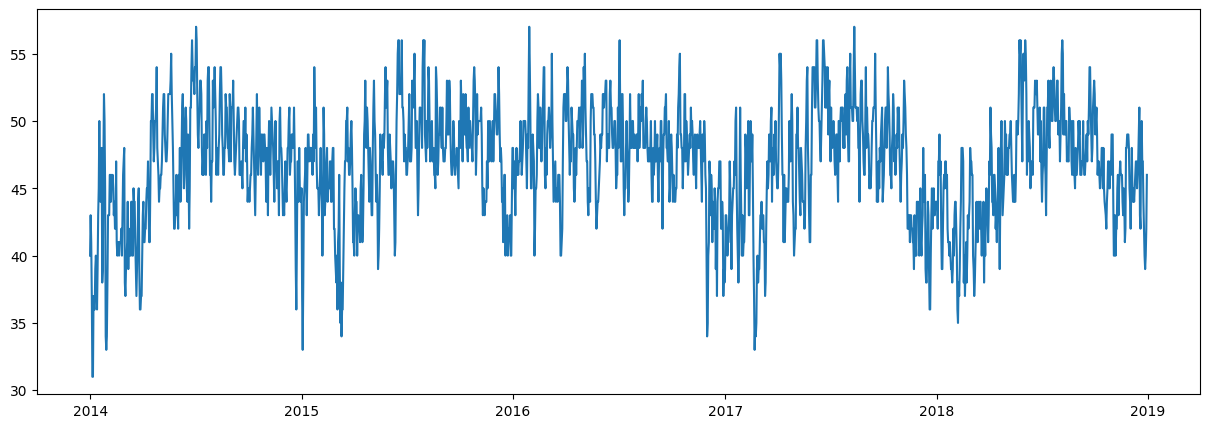

In [8]:
import matplotlib.pyplot as plt

# plot data distribution to visually check whether the data distribution stationary or not
plt.figure(figsize=(15, 5))
plt.plot(df["AvgTemp"])
plt.show()

In [9]:
df['AvgTemp'].mean()

46.81878088962109

***lets check whether this distribution is stationary or not***

In [10]:
from statsmodels.tsa.stattools import adfuller

# check stationary-ness using Augmented Dickey–Fuller (ADF) test
def ad_fuller_test(data):
  dftest = adfuller(data, autolag='AIC') # this returns the values mentioned below
  
  print('ADF value: ', dftest[0])
  print('P   value: ', dftest[1])
  print('No:of lags used: ', dftest[3])
  print('No:of observations used for adf regression and critical values calculation', dftest[4])
  print('Critical values are:')
  for key, value in dftest[4].items():
    print('\t', key, ' : ', value)

In [11]:
ad_fuller_test(df['AvgTemp'])

ADF value:  -6.554680125068777
P   value:  8.675937480199653e-09
No:of lags used:  1808
No:of observations used for adf regression and critical values calculation {'1%': -3.433972018026501, '5%': -2.8631399192826676, '10%': -2.5676217442756872}
Critical values are:
	 1%  :  -3.433972018026501
	 5%  :  -2.8631399192826676
	 10%  :  -2.5676217442756872


***If the 'P value' is very small (eg:- 0.01), it means the data distribution is stationary***

<ul>
  <li> P value for this data distribution = 0.000000008675937480199653 </li>
  <li> It is extremly small therefore we can say that data distribution is **stationary** </li>
</ul>

In [12]:
import warnings
warnings.filterwarnings('ignore') # ignore neutral warnings

In [13]:
# check which ARIMA p,d,q combination fits the best for the 'AvgTemp' data distribution (which is the data distribution we are dealing with)
stepwise_fit = auto_arima(df['AvgTemp'], trace=True, suppress_warnings=True, start_p=2, start_q=4) # initialized p and q to reduce time taken to find best combination (values set through trial and error)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8306.228, Time=6.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.05 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=8297.028, Time=9.60 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=8455.435, Time=3.30 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.192, Time=9.49 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=8295.034, Time=13.08 sec
 ARIMA(0,0,5)(0,0,0)[0] intercept   : AIC=8419.091, Time=2.83 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=8302.544, Time=10.17 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=8304.533, Time=0.59 sec

Best model:  ARIMA(1,0,5)(0,0,0)[0] intercept
Total fit time: 55.859 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.517
Date:                Sat, 16 Mar 2024   AIC                           8295.034
Time:                        16:05:40   BIC                           8339.092
Sample:                             0   HQIC                          8311.288
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2070      0.362      3.335      0.001       0.498       1.916
ar.L1          0.9739      0.008    124.621      0.000       0.959       0.989
ma.L1         -0.1246      0.024     -5.256      0.000      -0.171      -0.078
ma.L2         -0.2196      0.024     -9.115      0.000      -0.267      -0.172
ma.L3         -0.2056      0.024     -8.615      0.000      -0.252      -0.159
ma.L4         -0.1373      0.023     -6.034      0.000      -0.182      -0.093
ma.L5         -0.0476      0.024     -1.952      0.051      -0.095       0.000
sigma2         5.4981      0.172     31.952      0.000       5.161       5.835
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                20.20
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### ***The model with the lowest AIC score is the best fit*** <br>So here its ARIMA(1, 0, 5)

***This is essentially an ARMA model because their is no differencing done, because it is not required as the data distribution was confirmed to be a stationary distribution.***

In [14]:
# split dataset, train : test 9 : 1
# short term forecasting is better when we have short forecasting horizons (days in this case)

# avoid using sklearn's train_test_split as this will randomly split rows, not sequentially (as we need in this time series data)

train = df.iloc[:1639, :]
test = df.iloc[1639:, :]

In [15]:
train

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
...,...,...,...,...,...
2018-06-26,40.0,57.0,49.0,546,1904
2018-06-27,39.0,60.0,50.0,546,1904
2018-06-28,42.0,60.0,51.0,546,1905


In [16]:
test

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-07-01,40.0,52.0,46.0,547,1905
2018-07-02,40.0,48.0,44.0,548,1905
2018-07-03,39.0,52.0,46.0,548,1905
2018-07-04,40.0,54.0,47.0,548,1905
2018-07-05,39.0,63.0,51.0,549,1905
...,...,...,...,...,...
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753


In [17]:
print('train dims : ', train.shape)
print('test dims : ', test.shape)

train dims :  (1639, 5)
test dims :  (182, 5)


In [18]:
print(train['AvgTemp'].mean())
print(test['AvgTemp'].mean())
# means are extremely close to one another
# further proving stationary-ness

46.75411836485662
47.4010989010989


##***Train the model***

In [19]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['AvgTemp'], order=(1, 0, 5))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1639
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -3746.965
Date:                Sat, 16 Mar 2024   AIC                           7509.930
Time:                        16:05:42   BIC                           7553.144
Sample:                             0   HQIC                          7525.957
                               - 1639                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5614      0.826     56.344      0.000      44.942      48.181
ar.L1          0.9861      0.005    180.947      0.000       0.975       0.997
ma.L1         -0.1404      0.024     -5.825      0.000      -0.188      -0.093
ma.L2         -0.2255      0.025     -9.110      0.000      -0.274      -0.177
ma.L3         -0.2181      0.025     -8.893      0.000      -0.266      -0.170
ma.L4         -0.1456      0.024     -6.088      0.000      -0.192      -0.099
ma.L5         -0.0643      0.026     -2.511      0.012      -0.114      -0.014
sigma2         5.6601      0.187     30.215      0.000       5.293       6.027
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                13.96
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -0.15
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
# do forecasting of future values, starting from the next date of the last date in the training data
start_date = len(train)
end_date = start_date + len(test) - 1
predicted = model.predict(start_date, end_date) # no need of specifying " typ='levels' " because no differencing was required

In [21]:
predicted.index=df.index[start_date:end_date+1]
print(predicted)

DATE
2018-07-01    50.019733
2018-07-02    49.934512
2018-07-03    49.742430
2018-07-04    49.520126
2018-07-05    49.294010
                ...    
2018-12-26    46.803420
2018-12-27    46.800052
2018-12-28    46.796732
2018-12-29    46.793457
2018-12-30    46.790229
Name: predicted_mean, Length: 182, dtype: float64


***Visualize the test data vs predicted data***

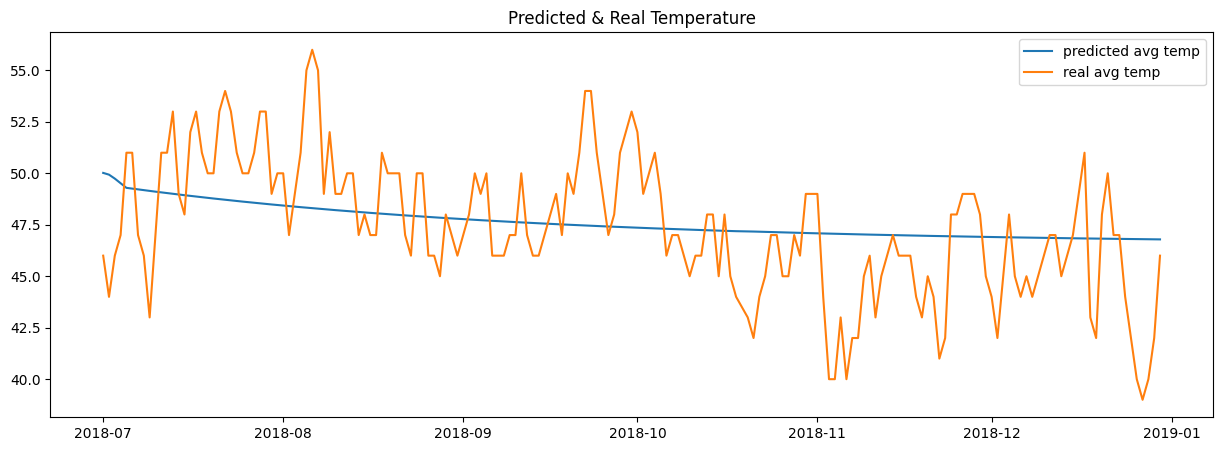

In [22]:
plt.figure(figsize=(15, 5))
plt.plot(predicted, label='predicted avg temp')
plt.plot(test['AvgTemp'], label='real avg temp')
plt.title('Predicted & Real Temperature')
plt.legend()
plt.show()

In [23]:
print(abs(test['AvgTemp'].mean() - predicted.mean())) # very close means, a sign that the model is good
print(test['AvgTemp'].mean(), " ", predicted.mean(), train['AvgTemp'].mean())

0.22156146719712666
47.4010989010989   47.622660368296025 46.75411836485662


##***Lets do some further evaluation***
***
- Root Mean Squared Error

In [24]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

rms_error = sqrt(mse(predicted, test['AvgTemp']))

In [25]:
print('rmse : ', rms_error)
print('test/real data mean : ', test['AvgTemp'].mean())

rmse :  3.0229403619397353
test/real data mean :  47.4010989010989


In [26]:
df['AvgTemp'].max() - df['AvgTemp'].min()

26.0

## ***It is quite an acceptable model as the range of AvgTemp column is 26, and RMSE is 3.0229 which is a lot less than 26.***

In [27]:
3.0229/26

0.11626538461538462

##***Now to forecast temperature on the future dates***
***
**You can manipulate the variable '*days_to_forecast*' as per your wish, but it is advised to have short forecasting time frames(max 182 days) since this data distribution is plotted on a daily basis**
<br>
<br>
**The test set size is 182 days**, therefore it is considered a good practice to not forecast beyond that forecasting horizon.



In [34]:
# use the 'days_to_forecast' variable below to set no:of days to forecast from 2018-12-31 (inclusive)
days_to_forecast = 60
forecast = model.predict(start=len(df), end=len(df)+days_to_forecast-1)
forecast.index=pd.date_range(start='2018-12-31', freq='D', periods=days_to_forecast)

In [35]:
forecast

2018-12-31    46.787045
2019-01-01    46.783905
2019-01-02    46.780809
2019-01-03    46.777756
2019-01-04    46.774746
2019-01-05    46.771778
2019-01-06    46.768850
2019-01-07    46.765964
2019-01-08    46.763118
2019-01-09    46.760311
2019-01-10    46.757543
2019-01-11    46.754814
2019-01-12    46.752123
2019-01-13    46.749470
2019-01-14    46.746853
2019-01-15    46.744272
2019-01-16    46.741728
2019-01-17    46.739219
2019-01-18    46.736745
2019-01-19    46.734305
2019-01-20    46.731899
2019-01-21    46.729527
2019-01-22    46.727188
2019-01-23    46.724881
2019-01-24    46.722606
2019-01-25    46.720363
2019-01-26    46.718151
2019-01-27    46.715970
2019-01-28    46.713820
2019-01-29    46.711699
2019-01-30    46.709608
2019-01-31    46.707546
2019-02-01    46.705512
2019-02-02    46.703507
2019-02-03    46.701530
2019-02-04    46.699580
2019-02-05    46.697657
2019-02-06    46.695762
2019-02-07    46.693892
2019-02-08    46.692049
2019-02-09    46.690231
2019-02-10    46

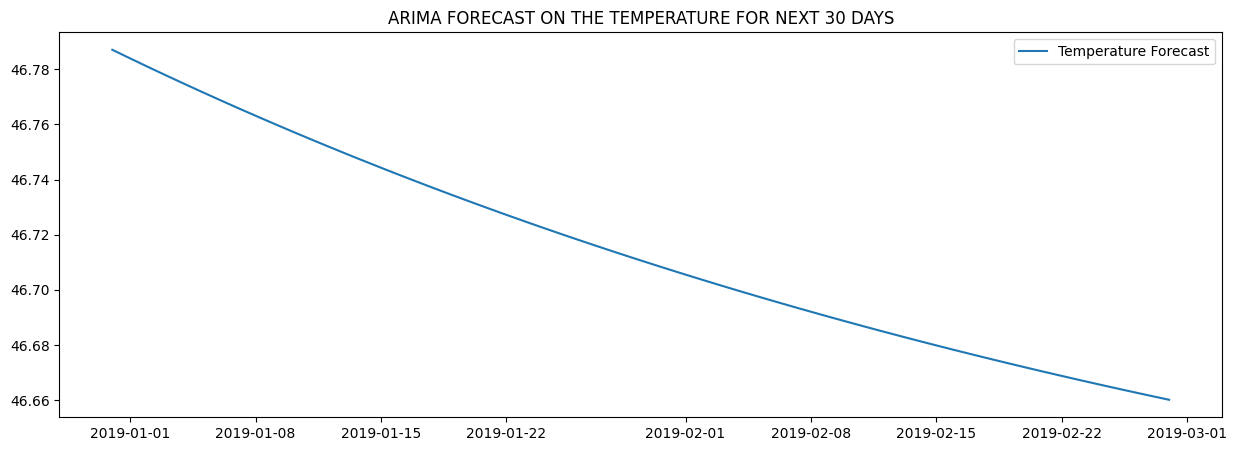

In [36]:
plt.figure(figsize=(15, 5))
plt.title('ARIMA FORECAST ON THE TEMPERATURE FOR NEXT 30 DAYS')
plt.plot(forecast, label='Temperature Forecast')
plt.legend()
plt.show()